# Notebook Juan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
from os.path import dirname, abspath
import matplotlib.pyplot as plt
from cycler import cycler

## Enviroment Settings

In [2]:
repo_dir = "/home/jovyan/work/EPM/Data/"

## Work Orders Dataset

In [3]:
wold = pd.read_csv(repo_dir + 'HistoricoAdjuntosActivosOT.csv', delimiter=';',dtype='object')
wold.head()

,ASSETNUM,SLXNUMACTEXT,SLXDESCACTEXT,WORKTYPE,SLXNUMTOT,SLXDESCOT,SLXFECCREACIONOT,SLXFECINICIOOT,SLXFECFINOT,DOCUMENT
0,2977237,2879,CIRCUITOS ALUMBRADO C/M TS-ALUMBRADO TOMAS 220...,MP,1000740,REVISION GENERAL,14/2/2007,14/2/2007,14/2/2007,HISTORIAJDE_01312033_OT_1000740
1,2976789,2878,CIRCUITOS ALUMBRADO C/V TS-ALUMBRADO TOMAS 480...,MP,1001233,REVISION GENRAL,15/2/2007,15/2/2007,15/2/2007,HISTORIAJDE_01312033_OT_1001233
2,NaN,2907,INTERCAMBIADOR PLACAS 2 U1 TS-MARCA ALFA-LAVA-...,MP,1001382,LAVAR INT PLACAS 2 U1 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001382
3,2977052,3069,TABLERO TURBINA U2 TS-MARCA NEYRPIC---,CPROG,1001383,MALA SEÑALIZ TABL TURB U1 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001383
4,2977266,2955,MOTOBOMBA 2 AGUA FRIA TS-MARCA SIHI-HALB-SISTE...,CPROG,1001386,FUGA AGUA PRENSOEST AFFA-2 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001386


In [4]:
wonew = pd.read_excel(repo_dir+"RegistrosOrdenesDeTrabajo.xlsx")
wonew.head()

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,<html><div>AJUSTE DE LA HORA EN SCADA.</div><d...
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,"<html><font size=""2""> </font>\n<b>\n <font fa..."
2,82516,R/P REPARAR VALVULA MANUAL DEL BY-PASS,2976936,CINME,2018-07-18 15:06:53.999,2018-11-26 06:59:59.999,2018-11-26 12:59:59.999,RETORNO NO ACCIONADO,FUGA,REPARAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>R..."
3,82567,REPARAR AGUJAS DE REPUESTO,2976937,CINME,2018-07-18 15:50:47.999,2018-07-18 15:50:47.999,2020-12-04 10:44:12.000,"DANO EN RECUBRIMIENTO, ABOLLADURA, DEFORMACION","DESPLAZAMIENTO DEL TERRENO, DESLIZAMIENTO, ERO...",REPARAR,"<html><font color=""#000000"" face=""Times New Ro..."
4,83539,CORREGIR FUGA DE ACEITE CGI - U1,2976933,CINME,2018-07-19 14:43:19.999,2018-07-19 14:43:21.000,2018-08-08 10:42:17.000,FUGA,"FALLA EN ACCESORIO (VALVULA, SELLO, EMPAQUE, B...",CAMBIAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>C..."


In [5]:
#Remove boring columns
#wonew=wonew.drop(['DESCRIPTION', 'WORKLOG'], axis=1)
#Add interesting variables
wonew["STARTING_PERIOD"]= (wonew["ACTSTART"]-wonew["REPORTDATE"]).dt.days
wonew["WORK_PERIOD"]= (wonew["ACTFINISH"]-wonew["ACTSTART"]).dt.days
wonew

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG,STARTING_PERIOD,WORK_PERIOD
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,<html><div>AJUSTE DE LA HORA EN SCADA.</div><d...,15.0,140.0
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,"<html><font size=""2""> </font>\n<b>\n <font fa...",-2.0,1.0
2,82516,R/P REPARAR VALVULA MANUAL DEL BY-PASS,2976936,CINME,2018-07-18 15:06:53.999,2018-11-26 06:59:59.999,2018-11-26 12:59:59.999,RETORNO NO ACCIONADO,FUGA,REPARAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>R...",130.0,0.0
3,82567,REPARAR AGUJAS DE REPUESTO,2976937,CINME,2018-07-18 15:50:47.999,2018-07-18 15:50:47.999,2020-12-04 10:44:12.000,"DANO EN RECUBRIMIENTO, ABOLLADURA, DEFORMACION","DESPLAZAMIENTO DEL TERRENO, DESLIZAMIENTO, ERO...",REPARAR,"<html><font color=""#000000"" face=""Times New Ro...",0.0,869.0
4,83539,CORREGIR FUGA DE ACEITE CGI - U1,2976933,CINME,2018-07-19 14:43:19.999,2018-07-19 14:43:21.000,2018-08-08 10:42:17.000,FUGA,"FALLA EN ACCESORIO (VALVULA, SELLO, EMPAQUE, B...",CAMBIAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>C...",0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19314,5190017,VERIFICAR IGUALACION PRESIONES BYPASS TRU2,4228721,CPROG,2021-04-23 10:36:18.000,2021-05-05 08:00:00.000,2021-05-05 12:00:00.000,LECTURA ANORMAL DE INSTRUMENTO,DESAJUSTADO,CALIBRAR,"<html><p class=""MsoNormal"" style=""text-align:j...",11.0,0.0
19315,5174666,TE: MANTENIMIENTRO ANILLOS ROZANTES,2977094,MP,2021-04-20 16:57:16.999,2021-05-19 11:30:34.000,NaT,NaN,NaN,NaN,"<html><div> </div><div><font size=""2""><b> MAY ...",28.0,NaN
19316,5174674,TV: MANTENIMIENTO ESTACION HIDRAULICA,2977142,MP,2021-04-20 16:57:32.000,2021-05-18 18:00:00.000,2021-05-18 20:00:00.000,NaN,NaN,NaN,"<html><p class=""MsoNormal""><b><span lang=""ES"" ...",28.0,0.0
19317,5226718,LAVADO INTERCAMBIADOR DE CALOR,5493046,MBC,2021-05-01 10:41:16.999,2021-05-02 08:00:00.000,2021-05-19 14:24:22.000,NaN,NaN,NaN,<html><div>DOMINGO 02 DE MAYO DE 2021 </div><d...,0.0,17.0


In [6]:
wonew["WONUM"]=wonew["WONUM"].astype(str)
wonew["ASSETNUM"]=wonew["ASSETNUM"].astype(str)
print(wonew.dtypes)
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']

# 1. Setting prop cycle on default rc parameter
plt.rc( 'lines', linewidth = 4 )
plt.rc( 'axes', prop_cycle = ( cycler( 'color', palette ) ) )

WONUM                      object
DESCRIPTION                object
ASSETNUM                   object
WORKTYPE                   object
REPORTDATE         datetime64[ns]
ACTSTART           datetime64[ns]
ACTFINISH          datetime64[ns]
PROBLEM                    object
CAUSE                      object
REMEDY                     object
WORKLOG                    object
STARTING_PERIOD           float64
WORK_PERIOD               float64
dtype: object


DESCRIPTION


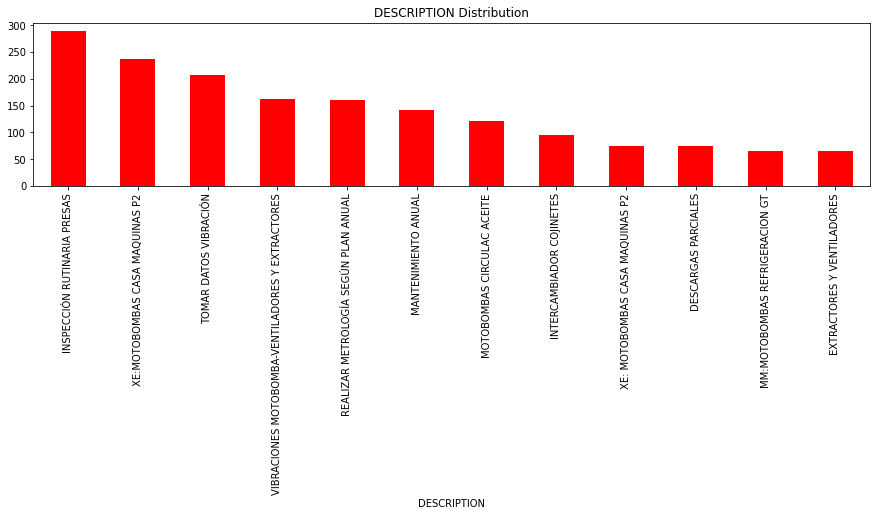

ASSETNUM


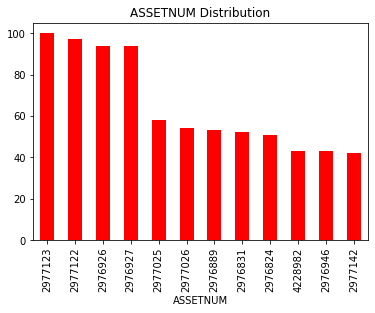

WORKTYPE


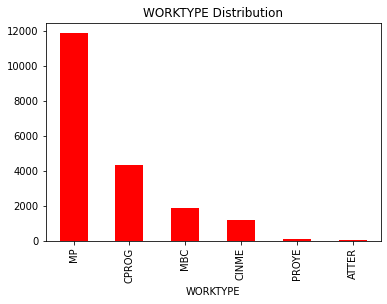

REPORTDATE


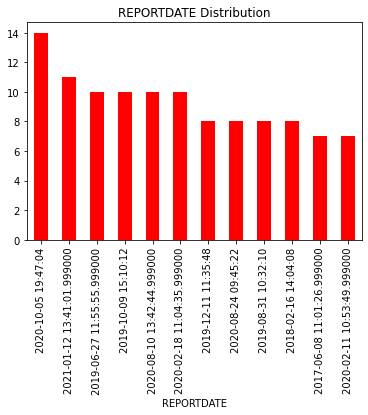

ACTSTART


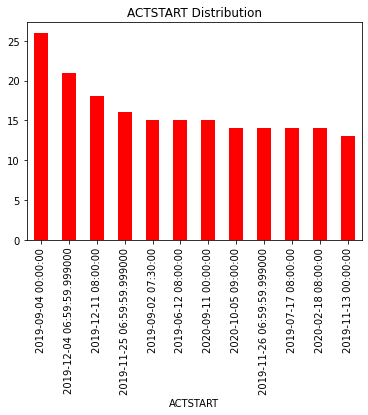

ACTFINISH


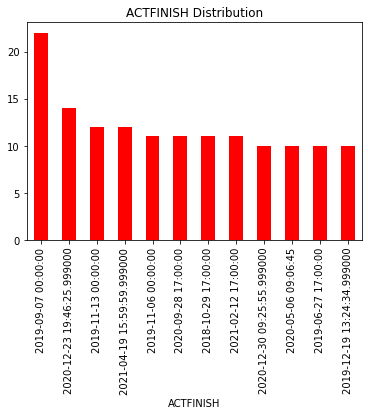

PROBLEM


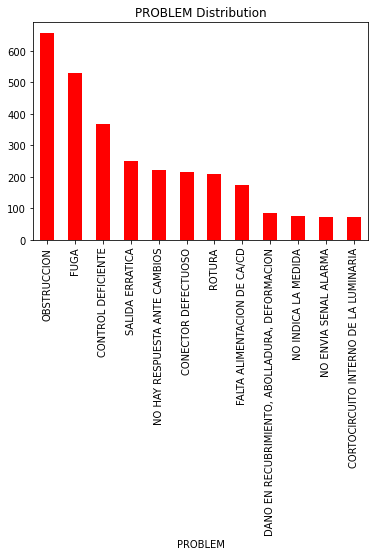

CAUSE


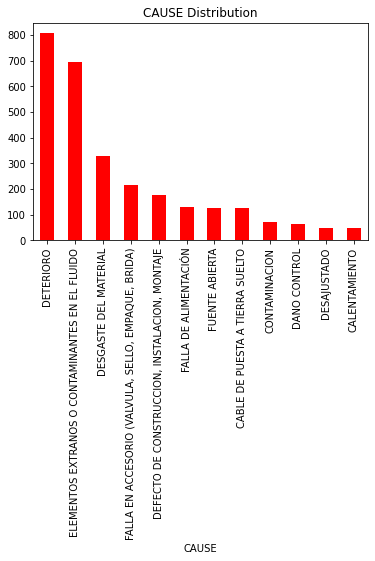

REMEDY


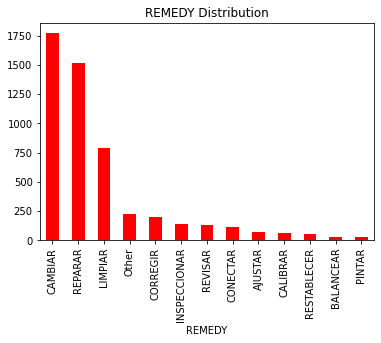

WORKLOG


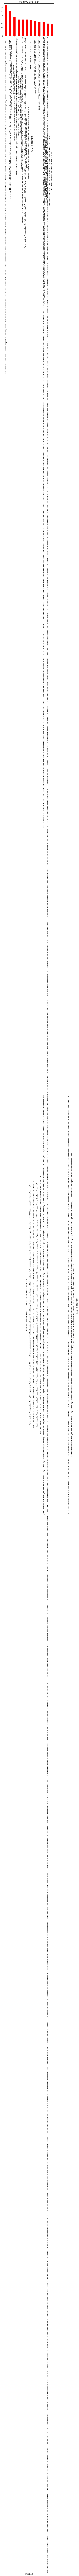

STARTING_PERIOD


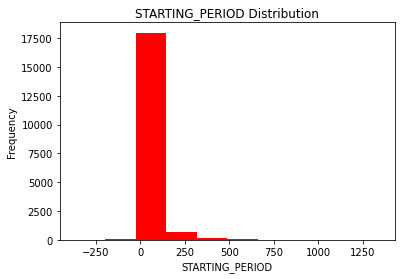

WORK_PERIOD


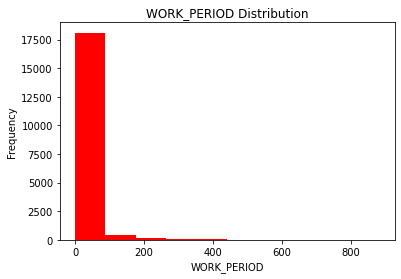

In [7]:
num_vars=["STARTING_PERIOD","WORK_PERIOD"]
columns=list(wonew.columns)
columns.remove("WONUM")
plt.figure(figsize=(15, 3)) # To make it larger
top_n=12
permitted=["REMEDY"]
for col in columns:
    print(col)
    plt.title(col+" Distribution") # Adding a title
    plt.xlabel(col) # Adding axis labels
    if (col not in num_vars):
        to_plot = wonew[col].value_counts().sort_values(ascending=False)
        size = to_plot.size
        if size > top_n:
            size=top_n
            if col in permitted:
                to_subplot=wonew.replace(wonew[col].value_counts().sort_values(ascending=False).index[top_n:], 'Other')
                to_plot=to_subplot[col].value_counts().sort_values(ascending=False)
            else:
                to_plot=to_plot.head(size)
        to_plot.plot.bar()
        plt.show() 
    else:
        wonew[col].plot.hist()
        plt.show()     

In [8]:
#Days
num_vars=["STARTING_PERIOD","WORK_PERIOD"]
for var in num_vars:
    print(wonew[var].describe())

count    19093.000000
mean        33.913319
std         72.024796
min       -365.000000
25%          1.000000
50%         13.000000
75%         31.000000
max       1343.000000
Name: STARTING_PERIOD, dtype: float64
count    18923.000000
mean        14.517307
std         53.005371
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        883.000000
Name: WORK_PERIOD, dtype: float64


[('DESCRIPTION', 'ASSETNUM'), ('DESCRIPTION', 'WORKTYPE'), ('DESCRIPTION', 'PROBLEM'), ('DESCRIPTION', 'CAUSE'), ('DESCRIPTION', 'REMEDY'), ('DESCRIPTION', 'WORKLOG'), ('DESCRIPTION', 'STARTING_PERIOD'), ('DESCRIPTION', 'WORK_PERIOD'), ('ASSETNUM', 'WORKTYPE'), ('ASSETNUM', 'PROBLEM'), ('ASSETNUM', 'CAUSE'), ('ASSETNUM', 'REMEDY'), ('ASSETNUM', 'WORKLOG'), ('ASSETNUM', 'STARTING_PERIOD'), ('ASSETNUM', 'WORK_PERIOD'), ('WORKTYPE', 'PROBLEM'), ('WORKTYPE', 'CAUSE'), ('WORKTYPE', 'REMEDY'), ('WORKTYPE', 'WORKLOG'), ('WORKTYPE', 'STARTING_PERIOD'), ('WORKTYPE', 'WORK_PERIOD'), ('PROBLEM', 'CAUSE'), ('PROBLEM', 'REMEDY'), ('PROBLEM', 'WORKLOG'), ('PROBLEM', 'STARTING_PERIOD'), ('PROBLEM', 'WORK_PERIOD'), ('CAUSE', 'REMEDY'), ('CAUSE', 'WORKLOG'), ('CAUSE', 'STARTING_PERIOD'), ('CAUSE', 'WORK_PERIOD'), ('REMEDY', 'WORKLOG'), ('REMEDY', 'STARTING_PERIOD'), ('REMEDY', 'WORK_PERIOD'), ('WORKLOG', 'STARTING_PERIOD'), ('WORKLOG', 'WORK_PERIOD'), ('STARTING_PERIOD', 'WORK_PERIOD')]
('DESCRIPTION',

FileNotFoundError: [Errno 2] No such file or directory: '../../images/DESCRIPTION_ASSETNUM.png'

<Figure size 2160x2592 with 0 Axes>

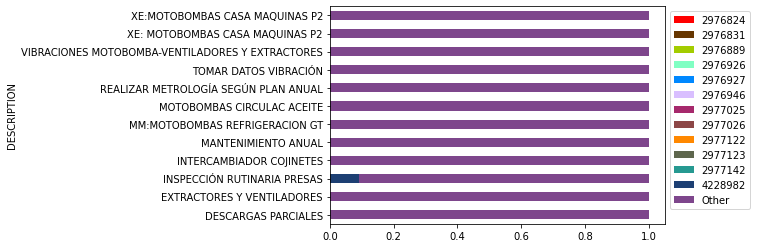

In [9]:
"""counts_df = wonew.groupby(["WORKTYPE","ASSETNUM"])["WONUM"].count().unstack()
a=wonew["ASSETNUM"].value_counts().sort_values(ascending=False).head(12).to_frame()
percents_df = counts_df.div(counts_df.sum()).T
helper=percents_df.index.isin(list(a.index))
filtered_df=percents_df[helper]

fig, ax = plt.subplots()
filtered_df.plot(kind="bar", stacked=True, ax=ax)"""
top_n=12
columns=list(wonew.columns)
columns.remove("WONUM")
columns.remove("REPORTDATE")
columns.remove("ACTSTART")
columns.remove("ACTFINISH")
num_vars=["STARTING_PERIOD","WORK_PERIOD"]

plt.figure(figsize=(30, 36)) # To make it larger
col_list=list(itertools.combinations(columns, 2))
print(col_list)
for comb in col_list:
    print(comb)
    wonewaux=wonew
    if (comb[1] not in num_vars):
        to_plot=wonew[comb[1]].value_counts().sort_values(ascending=False)
        size = to_plot.size
        if size > top_n:
            size=top_n
            wonewaux=wonew.replace(wonew[comb[1]].value_counts().sort_values(ascending=False).index[top_n:], 'Other')
        #if size > 12:
            #size=12
        #a=to_plot.head(size).to_frame()
        #pref_df = wonew[wonew[comb[1]].isin(list(a.index))]
        counts_df = wonewaux.groupby([comb[1],comb[0]])["WONUM"].count().unstack()
        to_plot=wonew[comb[0]].value_counts().sort_values(ascending=False)
        size = to_plot.size
        if size > 12:
            size=12
        a=to_plot.head(size).to_frame()
        percents_df = counts_df.div(counts_df.sum()).T
        helper=percents_df.index.isin(list(a.index))
        filtered_df=percents_df[helper]

        #fig.title(comb[1]+" Distribution per "+ comb[0]) # Adding a title
        #plt.xlabel(comb[0]) # Adding axis labels
        fig, ax = plt.subplots()
        fig = filtered_df.plot(kind="barh", stacked=True, ax=ax)
        plt.legend(bbox_to_anchor=(1.0, 1.0))
    else:
        #wonewaux[[comb[1],comb[0]]].plot.line()
        to_plot=wonew[comb[0]].value_counts().sort_values(ascending=False)
        size = to_plot.size
        if size > 12:
            size=12
        a=to_plot.head(size).to_frame()
        pref_df = wonew[wonew[comb[0]].isin(list(a.index))]
        pref_df[[comb[0],comb[1]]].boxplot(column=comb[1],by=comb[0],vert=False)
        plt.title("") # Adding a title
        plt.xlabel(comb[1]) # Adding axis labels
        plt.ylabel(comb[0]) # Adding axis labels
    plt.savefig("../../images/"+comb[0]+"_"+comb[1]+".png", dpi=700)
    plt.show()


# NLP

In [10]:
wold = pd.read_csv(repo_dir + 'DataSetsProcesados/historico_OTs_con_contenido_txt.csv', delimiter=',',dtype='object')
woldNLP = wold.drop(columns = ["Unnamed: 0",'DOCUMENT', 'SLXDESCACTEXT', 'SLXNUMACTEXT'])
renamed= {"SLXNUMTOT":"WONUM","SLXDESCOT":"DESCRIPTION","SLXFECCREACIONOT":"REPORTDATE","SLXFECINICIOOT":"ACTSTART","SLXFECFINOT":"ACTFINISH"}
woldNLP=woldNLP.rename(columns=renamed)
woldNLP.shape

(58391, 8)

In [11]:
#wonew = pd.read_excel(repo_dir+"RegistrosOrdenesDeTrabajo.xlsx")
wonew = pd.read_csv(repo_dir + 'DataSetsProcesados/historico_OTs_recientes_sin_html.csv', delimiter=',',dtype='object')
wonewNLP = wonew.drop(columns = ["Unnamed: 0"])
wonewNLP.shape

(19319, 11)

In [12]:
merge_nlp=pd.concat([wonewNLP,woldNLP], axis=0, ignore_index=True)
merge_nlp.shape

(77710, 11)

In [13]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
from nltk.tokenize import TweetTokenizer
import collections
import re
from collections import Counter 
import string

# remove punctuation, uppercase and stopwords
#I did the process of removing stopwords and punctuation  twice as it produced a cleaner version of the reviews.
def remove_sw(text,stop_words):
    tok=TweetTokenizer() #I used tweeter tokenizer so contractions are taken as one word. Ie: don't is one word.
    tokens = tok.tokenize(str(text).lower())
    text_nsw = [token for token in tokens if not token in stop_words] #Remove stopwords
    new_text = ' '.join(text_nsw)
    new_text=new_text.replace('\n', '')
    new_text=new_text.replace('', '')
    punctuation=string.punctuation
    new_text = re.sub(' +', ' ', new_text) #Remove extra blankspaces
    text ="".join([char if char not in punctuation else "" for char in new_text]) 
    new_text = re.sub(' +', ' ', text) 
    tokens = tok.tokenize(new_text.lower())
    text_nsw = [token for token in tokens if not token in stop_words] #Remove stopwords again
    new_text = ' '.join(text_nsw)
    new_text = re.sub("[0-9]+","",new_text)
    new_text = re.sub("\s+[a-z]\s+"," ",new_text)
    new_text = re.sub(' +', ' ', new_text) #Remove extra blankspaces
    
    return new_text

stop_words = stopwords.words('spanish') # I should add &quot, &#34, ive and im to stop words as they are frequent in movie_tv database
stop_words.append("ot")
stop_words.append("°")
stop_words.append("ot")
stop_words.append('')

#'don', "don't",
merge_nlp['WORKLOG']=merge_nlp['WORKLOG'].astype(str)
print(merge_nlp.dtypes)
#Keep negation of verbs for improving negative review analysis     
merge_nlp['cleanWL'] = merge_nlp['WORKLOG'].apply(lambda x: remove_sw(x,stop_words))

merge_nlp['cleanWL'].head()

WONUM          object
DESCRIPTION    object
ASSETNUM       object
WORKTYPE       object
REPORTDATE     object
ACTSTART       object
ACTFINISH      object
PROBLEM        object
CAUSE          object
REMEDY         object
WORKLOG        object
dtype: object


0    ajuste hora scada primero debe hacer revisar p...
1    jul programo wparrar ejecuto ahincapie lava ju...
2    solicitante reparar valvula manual guarda bypa...
3    jul programo wparrar ejecuto cataño laborando ...
4    solicitante corregir fuga aceite cojinete guia...
Name: cleanWL, dtype: object

In [15]:
pd.set_option('display.max_colwidth', None)
merge_nlp[["WORKLOG",'cleanWL']].head(2)

,WORKLOG,cleanWL
0,"AJUSTE DE LA HORA EN SCADA. Lo primero que se debe hacer es revisar el procedimiento para el ajuste de la hora en el SCADA. Este procedimiento dependerá donde está desajustada la hora en el sistema. Si es solo en un servidor, un controlador o todo el sistema.",ajuste hora scada primero debe hacer revisar procedimiento ajuste hora scada procedimiento dependerá desajustada hora sistema si solo servidor controlador sistema
1,"** JUL 16/2018 OT: 81011 PROGRAMO: WPARRAR EJECUTO: A.HINCAPIE ** SE LAVA JUEGO DE PLACAS DEL INTERCAMBIADOR 1 DE LA U1. SE BLOQUEA EL SISTEMA ELECTRICA Y MECANICAMENTE, SE BAJAN LAS PLACAS Y SE LAVAN CON AGUA A PRESION UTILIZANDO HIDROLAVADORA, SE REALIZA EL MONTAJE Y AJUSTE. SE NORMALIZA EL CIRCUITO DEL AGUA Y SE REVISA QUE NO PRESENTE FUGAS. EL SISTEMA QUEDA EN CONDICIONES DE SERVICIO.",jul programo wparrar ejecuto ahincapie lava juego placas intercambiador bloquea sistema electrica mecanicamente bajan placas lavan agua presion utilizando hidrolavadora realiza montaje ajuste normaliza circuito agua revisa presente fugas sistema queda condiciones servicio


In [16]:
def count_frequent(df):
    total_counts = Counter()
    reviews=df[["cleanWL"]] #Get Reviews
    for i,col in reviews.iterrows():
        for word in col["cleanWL"].lower().split(" "): 
            total_counts[word]+=1 #add to total counter

    return total_counts

merged_tot=count_frequent(merge_nlp)
top_n=21
print("Total",merged_tot.most_common()[0:top_n])

Total [('mantenimiento', 38728), ('realiza', 31671), ('unidad', 25779), ('', 25302), ('limpieza', 20507), ('realizar', 17605), ('aceite', 17405), ('realizó', 17365), ('sistema', 16938), ('fecha', 14748), ('equipo', 14701), ('programo', 14328), ('control', 13128), ('general', 12377), ('condiciones', 11642), ('preventivo', 11528), ('cojinete', 10892), ('trabajo', 10478), ('ejecuto', 10299), ('temperatura', 10105), ('seguridad', 10049)]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus) #produce n-gram Countvectorizer
    bag_of_words = vec.transform(corpus)  #Transform to count -matrix
    sum_words = bag_of_words.sum(axis=0)  # sum of matrix rows
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] # order n-grams in tuples
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #Sort n-grams
    return words_freq[:n] # return top n

pos_2gram=get_top_n_words(merge_nlp["cleanWL"],20,2)
pos_3gram=get_top_n_words(merge_nlp["cleanWL"],20,3)
pos_4gram=get_top_n_words(merge_nlp["cleanWL"],20,4)


print("bigrams: ",pos_2gram)
print("3-grams: ",pos_3gram)
print("4-grams(?): ",pos_4gram)


bigrams:  [('mantenimiento preventivo', 8572), ('realiza mantenimiento', 6945), ('sustancias quimicas', 5637), ('realiza limpieza', 5474), ('limpieza general', 4279), ('programo rarbolg', 3729), ('condiciones normales', 3678), ('dielectricos desengrasantes', 3385), ('realizó mantenimiento', 2933), ('realizar mantenimiento', 2669), ('seguridad industrial', 2619), ('salud ocupacional', 2538), ('rarbolg paso', 2503), ('según instructivo', 2498), ('tablero control', 2490), ('nivel aceite', 2484), ('normas seguridad', 2406), ('condiciones operativas', 2381), ('mantenimiento general', 2330), ('industriales automotrices', 2318)]
3-grams:  [('programo rarbolg paso', 2502), ('realiza mantenimiento preventivo', 2464), ('normas seguridad industrial', 2324), ('automotrices limpiadores dielectricos', 2268), ('limpiadores dielectricos desengrasantes', 2268), ('seguridad industrial salud', 2257), ('industrial salud ocupacional', 2256), ('rarbolg paso realizó', 1662), ('realizar mantenimiento preventi

In [18]:
import spacy
nlp = spacy.load("es_core_news_lg")

def spacy_tagger(text,nlp):
    doc = nlp(text)
    return [(w.text, w.pos_) for w in doc]
    
    
merge_nlp['cleanTaggedWL'] = merge_nlp['cleanWL'].apply(lambda x: spacy_tagger(x,nlp))
merge_nlp['taggedWL'] = merge_nlp['WORKLOG'].apply(lambda x: spacy_tagger(x,nlp))

merge_nlp.head(2)

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG,cleanWL,cleanTaggedWL,taggedWL
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,"AJUSTE DE LA HORA EN SCADA. Lo primero que se debe hacer es revisar el procedimiento para el ajuste de la hora en el SCADA. Este procedimiento dependerá donde está desajustada la hora en el sistema. Si es solo en un servidor, un controlador o todo el sistema.",ajuste hora scada primero debe hacer revisar procedimiento ajuste hora scada procedimiento dependerá desajustada hora sistema si solo servidor controlador sistema,"[(ajuste, NOUN), (hora, NOUN), (scada, ADJ), (primero, ADV), (debe, AUX), (hacer, VERB), (revisar, VERB), (procedimiento, NOUN), (ajuste, NOUN), (hora, NOUN), (scada, ADJ), (procedimiento, NOUN), (dependerá, VERB), (desajustada, ADJ), (hora, NOUN), (sistema, NOUN), (si, SCONJ), (solo, ADJ), (servidor, NOUN), (controlador, ADJ), (sistema, PROPN)]","[(AJUSTE, PROPN), (DE, ADP), (LA, DET), (HORA, NOUN), (EN, ADP), (SCADA, PROPN), (., PUNCT), ( , SPACE), (Lo, PRON), (primero, ADJ), (que, PRON), (se, PRON), (debe, AUX), (hacer, VERB), (es, AUX), (revisar, VERB), (el, DET), (procedimiento, NOUN), (para, ADP), (el, DET), (ajuste, NOUN), (de, ADP), (la, DET), (hora, NOUN), (en, ADP), (el, DET), (SCADA, PROPN), (., PUNCT), (Este, DET), (procedimiento, NOUN), (dependerá, VERB), (donde, PRON), (está, AUX), (desajustada, ADJ), (la, DET), (hora, NOUN), (en, ADP), (el, DET), (sistema, NOUN), (., PUNCT), (Si, SCONJ), (es, AUX), (solo, ADJ), (en, ADP), (un, DET), (servidor, NOUN), (,, PUNCT), (un, DET), (controlador, NOUN), (o, CCONJ), (todo, DET), (el, DET), (sistema, NOUN), (., PUNCT), ( , SPACE)]"
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,"** JUL 16/2018 OT: 81011 PROGRAMO: WPARRAR EJECUTO: A.HINCAPIE ** SE LAVA JUEGO DE PLACAS DEL INTERCAMBIADOR 1 DE LA U1. SE BLOQUEA EL SISTEMA ELECTRICA Y MECANICAMENTE, SE BAJAN LAS PLACAS Y SE LAVAN CON AGUA A PRESION UTILIZANDO HIDROLAVADORA, SE REALIZA EL MONTAJE Y AJUSTE. SE NORMALIZA EL CIRCUITO DEL AGUA Y SE REVISA QUE NO PRESENTE FUGAS. EL SISTEMA QUEDA EN CONDICIONES DE SERVICIO.",jul programo wparrar ejecuto ahincapie lava juego placas intercambiador bloquea sistema electrica mecanicamente bajan placas lavan agua presion utilizando hidrolavadora realiza montaje ajuste normaliza circuito agua revisa presente fugas sistema queda condiciones servicio,"[(jul, NOUN), (programo, VERB), (wparrar, NOUN), (ejecuto, ADJ), (ahincapie, PROPN), (lava, VERB), (juego, NOUN), (placas, ADJ), (intercambiador, ADJ), (bloquea, VERB), (sistema, PROPN), (electrica, PROPN), (mecanicamente, ADV), (bajan, VERB), (placas, NOUN), (lavan, VERB), (agua, NOUN), (presion, ADJ), (utilizando, VERB), (hidrolavadora, NOUN), (realiza, VERB), (montaje, NOUN), (ajuste, NOUN), (normaliza, VERB), (circuito, NOUN), (agua, NOUN), (revisa, VERB), (presente, ADJ), (fugas, NOUN), (sistema, NOUN), (queda, VERB), (condiciones, NOUN), (servicio, PROPN)]","[(*, NOUN), (*, SYM), ( , SPACE), (JUL, PROPN), (16/2018, NUM), (OT, PROPN), (:, PUNCT), (81011, NUM), (PROGRAMO, VERB), (:, PUNCT), (WPARRAR, PROPN), (EJECUTO, PROPN), (:, PUNCT), (A.HINCAPIE, VERB), ( , SPACE), (*, NOUN), (*, NOUN), ( , SPACE), (SE, PRON), (LAVA, VERB), (JUEGO, NOUN), (DE, ADP), (PLACAS, NOUN), (DEL, ADP), (INTERCAMBIADOR, ADJ), (1, NUM), (DE, ADP), (LA, DET), (U1, PROPN), (., PUNCT), (SE, PRON), (BLOQUEA, PROPN), (EL, DET), (SISTEMA, PROPN), (ELECTRICA, PROPN), (Y, CCONJ), (MECANICAMENTE, PROPN), (,, PUNCT), (SE, PRON), (BAJAN, PROPN), (LAS, DET), (PLACAS, PROPN), (Y, CCONJ), (SE, PRON), (LAVAN, PROPN), (CON, ADP), (AGUA, NOUN), (A, ADP), (PRESION, NOUN), (UTILIZANDO, PROPN), (HIDROLAVADORA, NOUN), (,, PUNCT

In [19]:
sentence=merge_nlp['cleanTaggedWL'].head(1).iloc[0]
sentence[0][1]

'NOUN'

In [20]:
import spacy.displacy as displacy
#sentence=merge_nlp['cleanWL'].head(1).iloc[0]
"""sentence=merge_nlp['WORKLOG'].head(1).iloc[0]
print(sentence)
doc=nlp(sentence)
for word in doc:
    print(word.text, word.pos_)"""
    
def spacy_NER(text,nlp):
    doc = nlp(text)
    return [(w.text, w.label_) for w in doc.ents]


nlp = spacy.load("es_core_news_lg")
merge_nlp['cleanNERWL'] = merge_nlp['cleanWL'].apply(lambda x: spacy_NER(x,nlp))
merge_nlp['NERdWL'] = merge_nlp['WORKLOG'].apply(lambda x: spacy_NER(x,nlp))

In [21]:
merge_nlp[["cleanNERWL","NERdWL"]].head(10)

,cleanNERWL,NERdWL
0,[],"[(AJUSTE DE LA HORA, LOC), (SCADA, MISC), (Si es solo en un servidor, MISC)]"
1,"[(jul programo, PER)]","[(OT, ORG), (PROGRAMO, MISC), (WPARRAR, MISC), (EJECUTO, MISC), (INTERCAMBIADOR, MISC), (SE BLOQUEA EL, LOC), (ELECTRICA, ORG), (MECANICAMENTE, ORG), (SE BAJAN LAS PLACAS, LOC), (SE LAVAN, LOC), (A PRESION UTILIZANDO HIDROLAVADORA, LOC), (SE REALIZA EL MONTAJE, LOC), (AJUSTE, MISC), (EL CIRCUITO DEL AGUA Y SE REVISA QUE NO PRESENTE FUGAS, MISC), (EL, MISC), (QUEDA, LOC), (CONDICIONES, MISC)]"
2,"[(ignacio tobon juan david gutierrez jul programo wparrar, PER)]","[(SOLICITANTE, MISC), (REPARAR LA, LOC), (VALVULA MANUAL, LOC), (GUARDA DEL BY-PASS, MISC), (ABAJO DE LA VÁLVULA DE, LOC), (TASAJERA, ORG), (ESTA NO ESTA PERMITIENDO CERRAR, PER), (SE QUEDA, LOC), (PEGADA, ORG), (Y ES NECESARIA PARA EJECUTAR BLOQUEOS, MISC), (LOS MANTENIMIENTOS, ORG), (REVISIONES DE RUEDA, PER), (REPARACION, LOC), (OTROS, MISC), (INFORMO, MISC), (TOBON, ORG), (JUAN DAVID GUTIERREZ , PER), (PROGRAMO, MISC), (WPARRAR, MISC), (EJECUTO, MISC), (J. FRANCO , PER), (ORDEN DE TRABAJO SE EJECUTARA EN EL, MISC), (NOVIEMBRE POR, MISC), (HAY QUE, ORG), (BAJAR TODO, ORG), (EL BY-PASS, MISC)]"
3,"[(jul programo, PER), (cataño, MISC)]","[(JUL 18/2018 OT, MISC), (PROGRAMO, MISC), (WPARRAR, MISC), (EJECUTO, MISC), (LABORANDO, MISC), (PARTE, MISC), (PERSONAL NUESTRO, MISC), (MAQUINANDO, MISC), (EL TALLER DE LA 30, MISC)]"
4,[],"[(SOLICITANTE, MISC), (FUGA, ORG), (EL COJINETE, MISC), (TRIMESTRALES SE LE A, MISC)]"
5,"[(jesus galvis alvaro quenguanjuan, PER), (david gutierrez, PER)]","[(SOLICITANTE, MISC), (CHEQUES DE ENTRADA, MISC), (ACUMULADOR PARA EL FRENADO DE LA UNIDAD N°3 DE LA, MISC), (TASAJERA, ORG), (YA QUE, ORG), (SE APRECIO UNA CAIDA DE PRESION DE ESTE, ORG), (LLEGANDO, MISC), (LOS PUNTOS, MISC), (ALARMA, MISC), (CUANDO, ORG), (PERDIO PRESION, ORG), (TRABAJOS EN LA CASA DE, ORG), (MAQUINAS, ORG), (IMAGÉNES ANEXAS, MISC), (DAVID GUTIERREZ, PER)]"
6,"[(jul programo, PER), (cataño, MISC)]","[(OT, ORG), (PROGRAMO, MISC), (WPARRAR, MISC), (EJECUTO, MISC), (JUEGO DE PLACAS, MISC), (INTERCAMBIADOR, MISC), (U2, ORG), (SE BLOQUEA EL, ORG), (ELECTRICA, ORG), (MECÁNICAMENTE, ORG), (SE BAJAN LAS PLACAS, LOC), (SE LAVAN, LOC), (A PRESION, LOC), (HIDROLAVADORA, MISC), (SE REALIZA EL MONTAJE, LOC), (AJUSTE, MISC), (INTERCAMBIADOR, MISC), (EL CIRCUITO DE AGUA, MISC), (SE VERIFICA, ORG), (NO SE PRESENTEN FUGAS, ORG), (EL, MISC), (QUEDA, LOC), (CONDICIONES, ORG), (SER, ORG), (PUESTO, LOC)]"
7,"[(jul programo, PER)]","[(PROGRAMO, MISC), (WPARRAR, MISC), (EJECUTO, MISC), (INTERCAMBIADOR, MISC), (SE BLOQUEA EL, LOC), (ELECTRICA, ORG), (MECANICAMENTE, ORG), (SE BAJAN LAS PLACAS, LOC), (SE LAVAN, LOC), (A PRESION UTILIZANDO HIDROLAVADORA, LOC), (SE REALIZA EL MONTAJE, LOC), (AJUSTE, MISC), (EL CIRCUITO DEL AGUA Y SE REVISA QUE NO PRESENTE FUGAS, MISC), (EL, MISC), (QUEDA, LOC), (CONDICIONES, MISC)]"
8,"[(luis edwin robayo ago programo wparrar, PER)]","[(SOLICITANTE, MISC), (REVISAR VENTILADOR S5 LOCALIZADO, MISC), (EL CUAL EXTRAE EL AIRE DE CÁMARA, MISC), (PRESENTA RUIDO ANORMAL, ORG), (DESTENSIONADAS, ORG), (REPORTAN, MISC), (LUIS, PER), (ROBAYO, MISC), (PROGRAMO, MISC), (WPARRAR, MISC), (EJECUTO, MISC), (LIMPIEZA EN GENERAL SE ALINEAN, ORG), (LAS POLEAS, PER), (SE TENSIONAN LAS BANDAS, LOC), (REFERENCIA ES, ORG), (GASTADAS LAS BANDAS, MISC), (SE PROCEDERA, ORG), (MONTAR UNA COMPRA, ORG), (CAMBIARLAS, ORG), (DEJA, ORG), (CONDICIONES, MISC)]"
9,"[(fernando yepes may, PER), (fernando yepez, PER), (embalse riogrande ii, LOC), (fernando yepes, PER)]","[(FUGA, ORG), (EN LA VALVULA, PER), (DESCARGA, MISC), (FONDO DEL EMBALSE DE RIOGRANDE, MISC), (LAS LLUVIAS PRESENTADAS EN EL SITIO EL ACEITE, MISC), (ESTA EN EL, PER), (PISO ES ARRASTRADO HASTA UNA QUEBRADA UBICADA, MISC), (VALVULA, LOC), (SE ANEXA, LOC), (INFORMA, MISC), (FERNANDO YEPES, PER), (MAY 21/18 OT, MISC), (FERNANDO, PER), (SE ANEXA REGISTRO FOTO, LOC), (EN LA VÁLVULA DESCARGA, PER), (FODO EMBALSE RIOGR

In [22]:
merge_nlp.to_csv(repo_dir+"DataSetsProcesados/Historico_NLP.csv", sep=';')